## Deep Gaussian Processes for Supervised Learning
This notebook aims at performing simple regression tasks on some designed non-stationary functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import GPy
from pylab import *
%matplotlib inline
import os
from sys import path
np.random.seed(42)

In [2]:
# Add parent directory to path if deepgp is not there already
pwd = os.getcwd()
base_path = pwd[0:pwd.rfind(os.sep)]
path.insert(0,base_path)

In [3]:
import deepgp

### Data to Regress

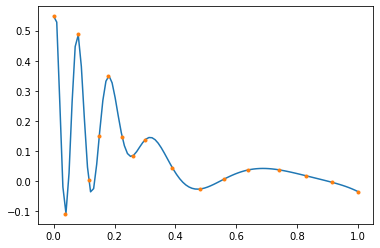

In [268]:
X = np.linspace(0, 1, 100)
Xts = np.array([0, 0.0385,0.08, 0.115, 0.15, 0.18, 0.225, 0.26, 0.30, 0.39, 0.48, 0.56, 0.64, 0.74, 0.83, 0.915, 1.])
Y = -0.5*(np.sin(40*(X-0.85)**4)*np.cos(2.5*(X - 0.95)) + 0.5*(X - 0.9))
Yts = -0.5*(np.sin(40*(Xts-0.85)**4)*np.cos(2.5*(Xts - 0.95)) + 0.5*(Xts - 0.9))
plt.plot(X,Y)

plt.plot(Xts, Yts, ".")

In [275]:
x = Xts[:,None]
y = Yts[:,None]

In [276]:
offset = y.mean()
scale = np.sqrt(y.var())
yhat = (y-offset)/scale

In [277]:
hidden = 2
m = deepgp.DeepGP([y.shape[1],hidden,x.shape[1]],Y=yhat, X=x, inits=['PCA','PCA'], 
                  kernels=[GPy.kern.RBF(hidden,ARD=True),
                           GPy.kern.RBF(x.shape[1],ARD=True)], # the kernels for each layer
                  num_inducing=250, back_constraint=False)

In [278]:
# Make sure initial noise variance gives a reasonable signal to noise ratio.
# Fix to that value for a few iterations to avoid early local minima
for i in range(len(m.layers)):
    output_var = m.layers[i].Y.var() if i==0 else m.layers[i].Y.mean.var()
    m.layers[i].Gaussian_noise.variance = output_var*0.001
    m.layers[i].Gaussian_noise.variance.fix()
m.optimize(messages=True,max_iters=10000)

TypeError: unsupported format string passed to NoneType.__format__

In [279]:
Xtest = np.linspace(0,1,100)
Ypredict = m.predict(Xtest[:,None])
print(x[:,0].shape)

(17,)


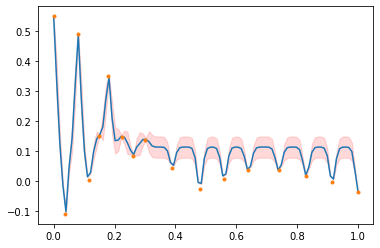

In [280]:
plt.plot(Xtest, Ypredict[0]*scale + offset)
plt.fill_between(Xtest, Ypredict[0][:,0]*scale + offset-2*Ypredict[1][:,0]*scale**2, Ypredict[0][:,0]*scale + offset+2*Ypredict[1][:,0]*scale**2, color='red', alpha=0.15, label='$2 \sigma_{2|1}$')
plt.plot(x, y, '.')

In [205]:
deepgp.util.visualize_DGP(m, ['0' for i in range(10)], layer=1, dims=[0,1]); plt.title('Layer 1')

AttributeError: 'builtin_function_or_method' object has no attribute 'shape'

In [50]:
from scipy.optimize import fmin

In [56]:
def f(x):
    X = np.array([x])
    return np.sin(2/(0.1+X))[0]

In [59]:
f(10)

0.19672821665727663

In [67]:
print([(f(j), j) for j in np.linspace(0.04,0.05,101)])

[(0.988987116719693, 0.04), (0.99044481896867, 0.040100000000000004), (0.991797681772795, 0.0402), (0.9930460089109474, 0.0403), (0.9941901140532038, 0.0404), (0.9952303206240156, 0.0405), (0.9961669616656387, 0.040600000000000004), (0.9970003797018373, 0.0407), (0.9977309266018776, 0.0408), (0.9983589634448321, 0.0409), (0.9988848603842121, 0.041), (0.9993089965129437, 0.0411), (0.9996317597287077, 0.0412), (0.9998535465996586, 0.0413), (0.9999747622305385, 0.0414), (0.9999958201292042, 0.0415), (0.9999171420735812, 0.0416), (0.9997391579790612, 0.0417), (0.9994623057663578, 0.041800000000000004), (0.9990870312298359, 0.0419), (0.9986137879063272, 0.042), (0.9980430369444495, 0.0421), (0.997375246974439, 0.0422), (0.9966108939785133, 0.042300000000000004), (0.9957504611617757, 0.0424), (0.9947944388236732, 0.0425), (0.9937433242300249, 0.0426), (0.9925976214856252, 0.0427), (0.9913578414074424, 0.042800000000000005), (0.9900245013984194, 0.0429), (0.988598125321884, 0.0430000000000000

### Data2 to regress

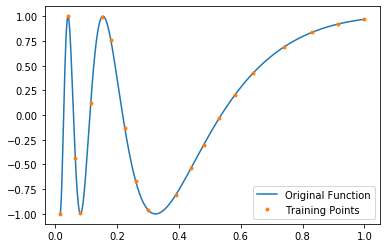

In [162]:
X = np.linspace(0.0157, 1, 1000)
Xts = np.array([0.0157,0.0415, 0.065 ,0.08, 0.115, 0.15, 0.18, 0.225, 0.26, 0.30, 0.39,0.44, 0.48, 0.53 , 0.58, 0.64, 0.74, 0.83, 0.915, 1.])
Y = np.sin(2/(0.1+X))
Yts = np.sin(2/(0.1+Xts))
plt.plot(X,Y, label = "Original Function")

plt.plot(Xts, Yts, ".", label = "Training Points")
plt.legend()
plt.savefig("originalFunction.pdf")

Y = np.sin(2/(0.1+X))

In [138]:
x = Xts[:,None]
y = Yts[:,None]

In [139]:
offset = y.mean()
scale = np.sqrt(y.var())
yhat = (y-offset)/scale

In [107]:
hidden = 2
m = deepgp.DeepGP([y.shape[1],hidden,x.shape[1]],Y=yhat, X=x, inits=['PCA','PCA'], 
                  kernels=[GPy.kern.RBF(hidden,ARD=True),
                           GPy.kern.RBF(x.shape[1],ARD=True)], # the kernels for each layer
                  num_inducing=20, back_constraint=False)

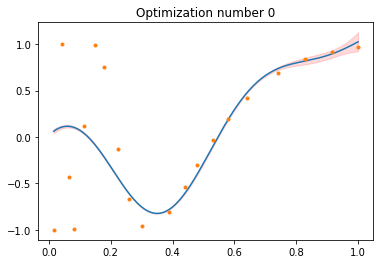

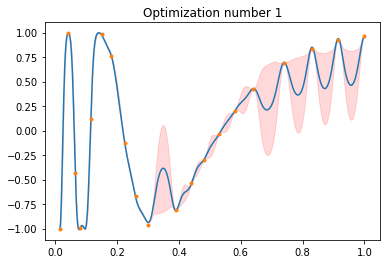

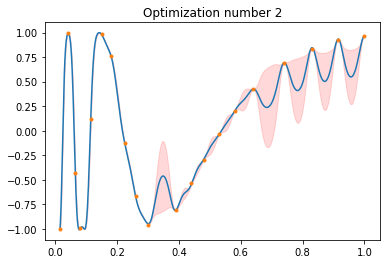

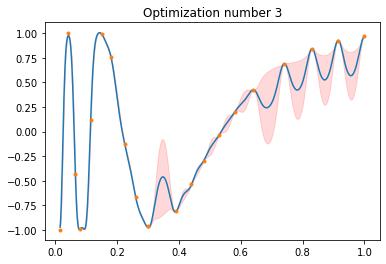

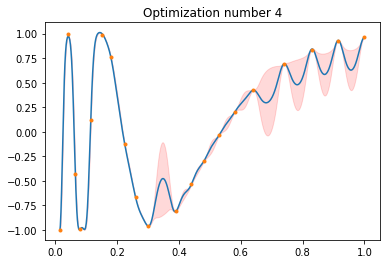

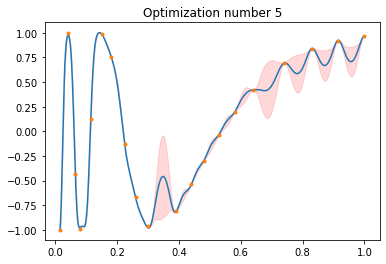

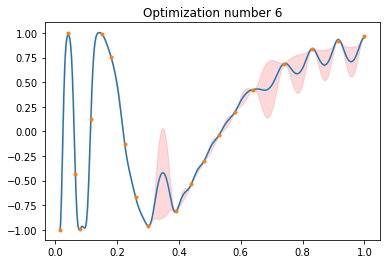

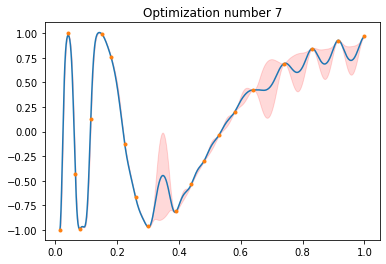

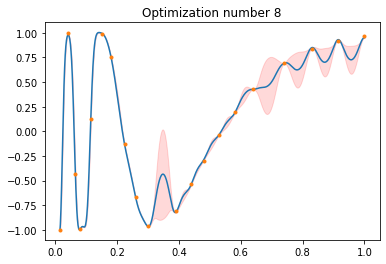

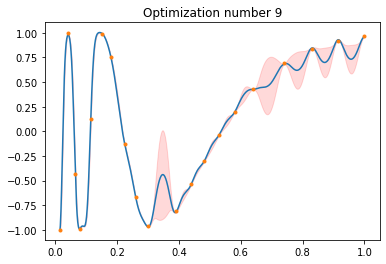

In [108]:
# Make sure initial noise variance gives a reasonable signal to noise ratio.
# Fix to that value for a few iterations to avoid early local minima
for i in range(len(m.layers)):
    output_var = m.layers[i].Y.var() if i==0 else m.layers[i].Y.mean.var()
    m.layers[i].Gaussian_noise.variance = output_var*0.001
    m.layers[i].Gaussian_noise.variance.fix()
    
for i in range(10):
    Xtest = np.linspace(0.0157,1,1000)
    Ypredict = m.predict(Xtest[:,None])
    plt.figure(i)
    plt.plot(Xtest, Ypredict[0]*scale + offset)
    plt.fill_between(Xtest, Ypredict[0][:,0]*scale + offset-2*Ypredict[1][:,0]*scale**2, Ypredict[0][:,0]*scale + offset+2*Ypredict[1][:,0]*scale**2, color='red', alpha=0.15, label='$2 \sigma_{2|1}$')
    plt.plot(x, y, '.')
    plt.title("Optimization number " + str(i))
    m.optimize(messages=True,max_iters=200)

In [394]:
# Unfix noise variance now that we have initialized the model
for i in range(len(m.layers)):
    m.layers[i].Gaussian_noise.variance.unfix()
m.optimize(max_iters=500, messages=True)

In [85]:
Xtest = np.linspace(0.0157,1,1000)
Ypredict = m.predict(Xtest[:,None])
print(x[:,0].shape)

(20,)


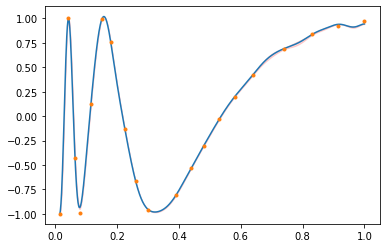

In [86]:
plt.plot(Xtest, Ypredict[0]*scale + offset)
plt.fill_between(Xtest, Ypredict[0][:,0]*scale + offset-2*Ypredict[1][:,0]*scale**2, Ypredict[0][:,0]*scale + offset+2*Ypredict[1][:,0]*scale**2, color='red', alpha=0.15, label='$2 \sigma_{2|1}$')
plt.plot(x, y, '.')

In [87]:
mean, var = m.layers[-1].predict(Xtest[:,None])

In [115]:
mean.shape

(1000, 2)

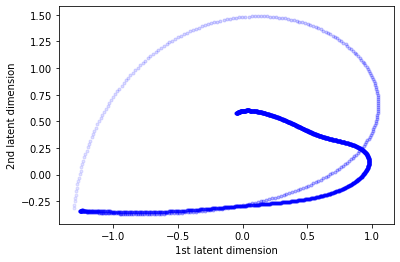

In [154]:
for i in range(mean.shape[0]):
    plt.plot(mean[i,0], mean[i,1], '.b', alpha = 0.1 + 0.9*(i/999))
plt.xlabel("1st latent dimension")
plt.ylabel("2nd latent dimension")
plt.savefig("supervisedlatent.pdf")

#### Comparison with sparse GP

In [157]:
m_GP = GPy.models.SparseGPRegression(X=x, Y=yhat, kernel=GPy.kern.RBF(x.shape[1])+GPy.kern.Bias(x.shape[1]), num_inducing=25)

In [158]:
m_GP.Gaussian_noise.variance = m_GP.Y.var()*0.001
m_GP.Gaussian_noise.variance.fix()
m_GP.optimize(max_iters=5000, messages=True)
#m_GP.Gaussian_noise.variance.unfix()
#m_GP.optimize(max_iters=400, messages=True)

In [159]:
Xtest = np.linspace(0.,1,1000)
Y_pred_GP = m_GP.predict(Xtest[:,None])

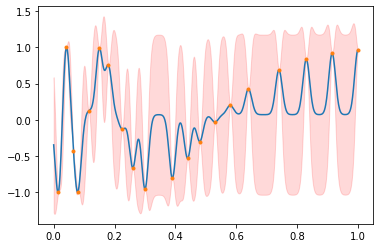

In [160]:
plt.plot(Xtest, Y_pred_GP[0]*scale + offset)
plt.fill_between(Xtest, Y_pred_GP[0][:,0]*scale + offset-2*Y_pred_GP[1][:,0]*scale**2, Y_pred_GP[0][:,0]*scale + offset+2*Y_pred_GP[1][:,0]*scale**2, color='red', alpha=0.15, label='$2 \sigma_{2|1}$')
plt.plot(x, y, '.')

In [365]:
mean

array([[-0.01013   ,  0.01449672],
       [-0.01865705,  0.02669953],
       [-0.03289365,  0.04707307],
       ...,
       [ 1.59547815, -0.45310226],
       [ 1.7034769 , -0.48377298],
       [ 1.74107287, -0.49444992]])

#### With 3 layers

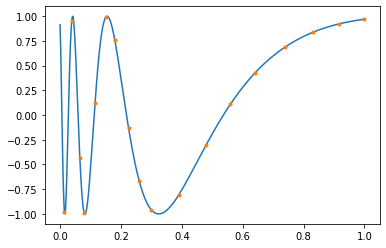

In [340]:
X = np.linspace(0, 1, 1000)
Xts = np.array([0.0145,0.0385, 0.065 ,0.08, 0.115, 0.15, 0.18, 0.225, 0.26, 0.30, 0.39, 0.48, 0.56, 0.64, 0.74, 0.83, 0.915, 1.])
Y = np.sin(2/(0.1+X))
Yts = np.sin(2/(0.1+Xts))
plt.plot(X,Y)

plt.plot(Xts, Yts, ".")

Y = np.sin(2/(0.1+X))

In [341]:
x = Xts[:,None]
y = Yts[:,None]

In [342]:
offset = y.mean()
scale = np.sqrt(y.var())
yhat = (y-offset)/scale

In [343]:
hidden = 2
m = deepgp.DeepGP([y.shape[1],hidden,hidden,x.shape[1]],Y=yhat, X=x, inits=['PCA','PCA','PCA'], 
                  kernels=[GPy.kern.RBF(hidden,lengthscale = 0.1, ARD=True),GPy.kern.RBF(hidden,lengthscale = 0.1, ARD=True),
                           GPy.kern.RBF(x.shape[1],lengthscale = 0.1,ARD=True)], # the kernels for each layer
                  num_inducing=20, back_constraint=False)

In [344]:
# Make sure initial noise variance gives a reasonable signal to noise ratio.
# Fix to that value for a few iterations to avoid early local minima
for i in range(len(m.layers)):
    output_var = m.layers[i].Y.var() if i==0 else m.layers[i].Y.mean.var()
    m.layers[i].Gaussian_noise.variance = output_var*0.001
    m.layers[i].Gaussian_noise.variance.fix()
m.optimize(messages=True,max_iters=20000)

In [ ]:
# Unfix noise variance now that we have initialized the model
for i in range(len(m.layers)):
    m.layers[i].Gaussian_noise.variance.unfix()
m.optimize(max_iters=1500, messages=True)

(18,)


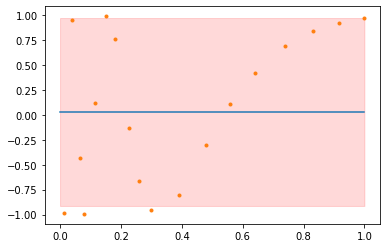

In [345]:
Xtest = np.linspace(0,1,1000)
Ypredict = m.predict(Xtest[:,None])
print(x[:,0].shape)
plt.plot(Xtest, Ypredict[0]*scale + offset)
plt.fill_between(Xtest, Ypredict[0][:,0]*scale + offset-2*Ypredict[1][:,0]*scale**2, Ypredict[0][:,0]*scale + offset+2*Ypredict[1][:,0]*scale**2, color='red', alpha=0.15, label='$2 \sigma_{2|1}$')
plt.plot(x, y, '.')